In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv("../data/locationdata.csv")
df['z'] = (df.z == 'a')
df


,x,y,z
0,269.678868,343.382471,True
1,290.032132,279.080807,True
2,261.105649,302.743449,True
3,308.651639,300.988053,True
4,237.141300,301.160656,True
...,...,...,...
711,296.935422,425.051577,False
712,351.723484,379.588071,False
713,409.712736,268.095513,False
714,388.547445,246.987018,False


<AxesSubplot:xlabel='x', ylabel='y'>

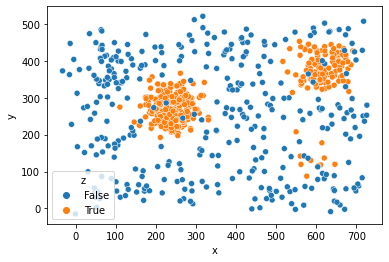

In [2]:
sns.scatterplot(data=df, x='x', y='y', hue='z')


In [3]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(df[['x', 'y']], df.z)


KNeighborsClassifier(n_neighbors=25)

Text(0.5, 1.0, 'KNN')

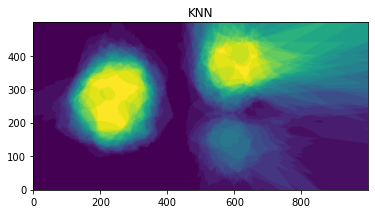

In [4]:
x, y = np.meshgrid(range(1000), range(500))
design_matrix = np.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))
preds = knn.predict_proba(design_matrix)
plt.imshow(preds[:, 1].reshape(500, 1000), origin='lower')
plt.title("KNN")


Text(0.5, 1.0, 'Naive Bayes')

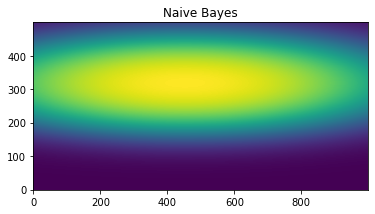

In [5]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(df[['x', 'y']], df.z)
preds = nb.predict_proba(design_matrix)
plt.imshow(preds[:, 1].reshape(500, 1000), origin='lower')
plt.title("Naive Bayes")


In [6]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(verbose=False)
cbc.fit(df[['x', 'y']], df.z)


Text(0.5, 1.0, 'Catboost')

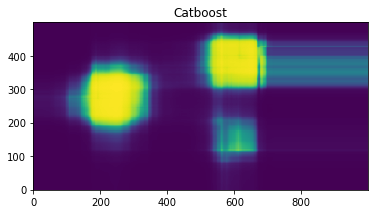

In [7]:
preds = cbc.predict_proba(design_matrix)
plt.imshow(preds[:, 1].reshape(500, 1000), origin='lower')
plt.title("Catboost")